# User Engagement Analysis 

In [1]:
import os

os.chdir("..")  # set the working directory one level up
from scripts.db_connection import DbConnection
from scripts.analyzer import Analyzer
from scripts.graph import Graph

db_connection = DbConnection()
analyzer = Analyzer()
graph = Graph()

DB connection engine created successfully.


## loading the data 

In [2]:
engin = db_connection.get_engine()
query = db_connection.select_all_query()
data = analyzer.load_data(query, engin)
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,6.917538e+18,4/27/2019 16:48,581.0,4/28/2019 0:45,956.0,28629.0,2.082017e+14,3.368908e+10,3.562051e+13,W42046C,...,6624685.0,14359287.0,16525739.0,15714976.0,795812180.0,11589951.0,400466676.0,1727898.0,46167921.0,830108755.0
1,7.277826e+18,4/27/2019 16:48,667.0,4/28/2019 3:15,224.0,37623.0,2.082018e+14,3.378380e+10,3.572231e+13,T83830B,...,20523749.0,19425580.0,13359593.0,9934665.0,787605714.0,10917685.0,675248509.0,7214331.0,50007602.0,824368038.0
2,7.349883e+18,4/27/2019 16:48,168.0,4/28/2019 3:15,224.0,37623.0,2.082018e+14,3.378380e+10,3.572231e+13,T83830B,...,20732615.0,4238634.0,12009162.0,10506778.0,291778510.0,6596766.0,661202929.0,11807415.0,36250702.0,339427949.0
3,1.304243e+19,4/27/2019 16:48,687.0,4/28/2019 0:59,532.0,29434.0,2.082017e+14,3.366612e+10,3.533311e+13,T42380B,...,16943531.0,734705.0,19501511.0,14305817.0,816467501.0,7251592.0,208313429.0,4679776.0,30055352.0,861829812.0
4,1.311448e+19,4/27/2019 16:48,699.0,4/28/2019 0:59,199.0,29434.0,2.082017e+14,3.366612e+10,3.533311e+13,T42380B,...,16736260.0,20709380.0,5770047.0,15850444.0,807860284.0,2642741.0,99982792.0,10823881.0,51213020.0,842115357.0


## Data cleaning 

In [3]:
cleaned_data = analyzer.handle_missing_values(data)
cleaned_data = analyzer.handle_outliers(cleaned_data)

 ## Top 10 customers per engagement metric 

In [4]:
query = db_connection.select_aggregate_query('"MSISDN/Number"', "Customer_ID", "Count")
engagement_metrics = analyzer.load_data(query, engin)
engagement_metrics

,customer_id,count
0,3.362632e+10,18
1,3.362578e+10,17
2,3.361489e+10,17
3,3.365973e+10,16
4,3.367588e+10,15
...,...,...
106851,3.366413e+10,1
106852,3.376098e+10,1
106853,3.376086e+10,1
106854,3.366673e+10,1


## Classifying  customers in three groups of engagement. 

In [5]:
engagement_cluster = analyzer.cluster(engagement_metrics, "count", 3)
engagement_cluster.iloc[3250:3255]

,customer_id,count,normalized_count,engagement_cluster
3250,3.367880e+10,4,0.176471,2
3251,3.366444e+10,3,0.117647,1
3252,3.366685e+10,3,0.117647,1
3253,3.365983e+10,3,0.117647,1
3254,3.368329e+10,3,0.117647,1


## Engagement cluster statistics  

In [6]:
cluster_stats = (
    engagement_cluster.groupby("engagement_cluster")["count"]
    .agg(["min", "max", "mean", "sum", "count"])
    .reset_index()
)

# Rename columns for clarity
cluster_stats.columns = [
    "Cluster",
    "Min Engagement",
    "Max Engagement",
    "Average Engagement",
    "Total Engagement",
    "Number of Customer",
]
cluster_stats

,Cluster,Min Engagement,Max Engagement,Average Engagement,Total Engagement,Number of Customer
0,0,1,1,1.000000,77731,77731
1,1,2,3,2.170905,56170,25874
2,2,4,18,4.624423,15034,3251


## visualize  Engagement cluster statistics  

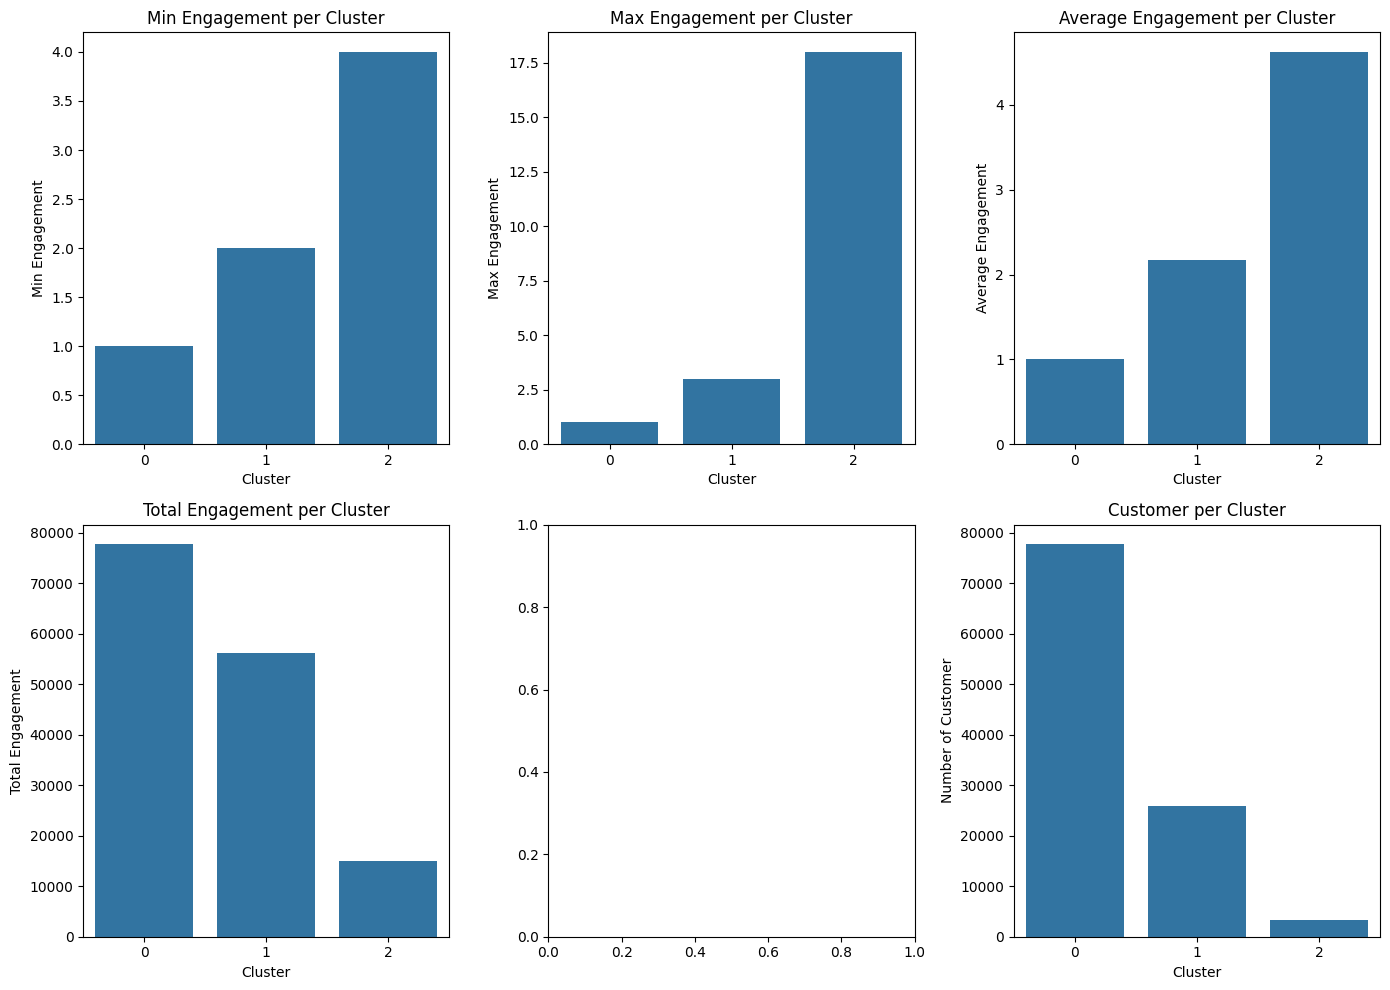

In [7]:
graph.plot_engagement_cluster(cluster_stats)

# user total traffic per application 

In [8]:
user_traffic = analyzer.user_traffic_per_apk(cleaned_data)

top_10_Google = user_traffic.nlargest(10, "Total Google Data")
top_10_Email = user_traffic.nlargest(10, "Total Email Data")
top_10_YouTube = user_traffic.nlargest(10, "Total YouTube Data")
top_10_Netflix = user_traffic.nlargest(10, "Total Netflix Data")
top_10_Gaming = user_traffic.nlargest(10, "Total Gaming Data")
top_10_Other = user_traffic.nlargest(10, "Total Other Data")
top_10_YouTube

,MSISDN/Number,Total Google Data,Total Email Data,Total YouTube Data,Total Netflix Data,Total Gaming Data,Total Other Data
13052,3.362578e+10,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09
92013,3.376054e+10,123223099.0,33693767.0,396289198.0,334643269.0,7.461045e+09,4.716134e+09
6373,3.361489e+10,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09
13395,3.362632e+10,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09
75613,3.367588e+10,109860502.0,31514421.0,317410572.0,309093159.0,6.970568e+09,6.798515e+09
13860,3.362708e+10,87125921.0,23567219.0,308790774.0,267040897.0,4.972353e+09,5.117791e+09
91669,3.376041e+10,82738720.0,25576965.0,303169107.0,318347546.0,6.268620e+09,4.101645e+09
85601,3.369879e+10,79736125.0,29059042.0,302661958.0,268247480.0,5.753743e+09,4.689876e+09
665,3.360313e+10,86929016.0,26198895.0,284090139.0,260488421.0,4.191445e+09,6.326671e+09
15507,3.363004e+10,76717543.0,26898243.0,275462004.0,233378572.0,4.794630e+09,4.978853e+09


# Plot the Top 3 Most Used Applications per user traffic


c:\Users\hp\Desktop\10x\ellCo-Telecom-Analysis\scripts\graph.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


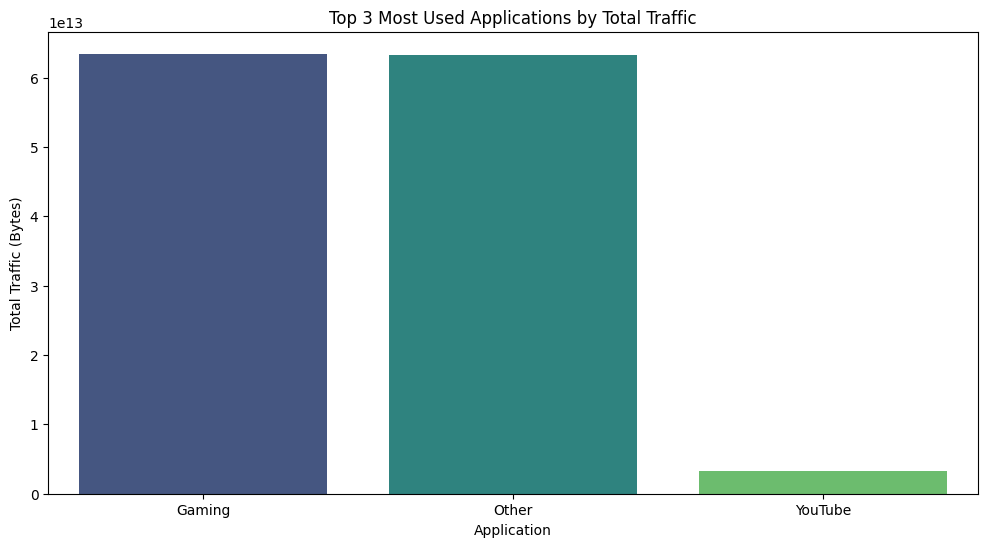

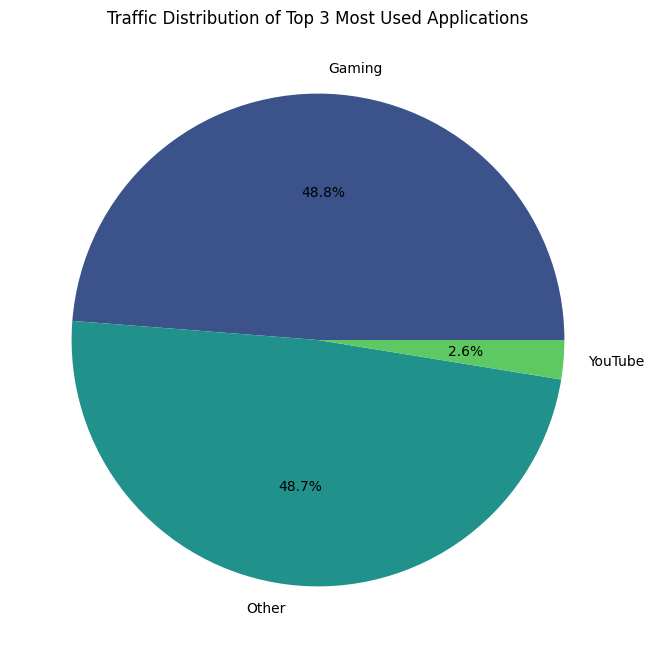

In [9]:
graph.plot_most_used_apk(user_traffic)